## Task 1

In [1]:
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial import distance

In [3]:
with open('sentences.txt') as f:
    lines = f.readlines()
lines[:5]

In [45]:
v = CountVectorizer(tokenizer = lambda x: re.split("[^a-z]+", re.sub("[^a-z]+", " ", x.lower()).strip()))
tokens = v.fit_transform(lines).toarray()
tokens

In [60]:
distances = [distance.cosine(tokens[0, :].flatten(), tokens[i, :].flatten()) for i in range(tokens.shape[0])]
distances = np.array(distances)
distances

In [106]:
cosine_idxs = distances.argsort()
print(lines[0].strip())
print(cosine_idxs[1], distances[cosine_idxs[1]], lines[cosine_idxs[1]].strip())
print(cosine_idxs[2], distances[cosine_idxs[2]], lines[cosine_idxs[2]].strip())

In comparison to dogs, cats have not undergone major changes during the domestication process.
6 0.732738758088 Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).
4 0.77708871497 In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.


In [94]:
result1 = "%d %d" % (cosine_idxs[1], cosine_idxs[2])
with open("submission_01_02_1.txt", "w") as f:
    f.write(result1)

## Task 2

In [79]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import linalg

In [90]:
def draw_function(f, title):
    xs = np.linspace(1, 15, 15, endpoint=True)
    ys = f(xs)
    plt.plot(xs, ys, label=title)
    plt.legend();

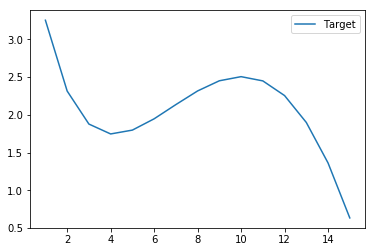

In [91]:
def ft(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
draw_function(ft, "Target")

In [99]:
def approx(f, xs):
    xs = np.array(xs)
    l = len(xs)
    ys = f(xs)
    A = np.zeros((l, l))
    for i in range(l):
        A[:, i] = xs ** i
    
    ws = linalg.solve(A, ys)
    print(l-1, ":", ws)
    
    def f_a(x):
        s = 0
        for i in range(l):
            s += ws[i] * x ** i
        return s

    draw_function(f_a, "%d-pow polynom" % (l-1))
    return ws

1 : [ 3.43914511 -0.18692825]
2 : [ 3.32512949 -0.06531159 -0.00760104]
3 : [ 4.36264154 -1.29552587  0.19333685 -0.00823565]


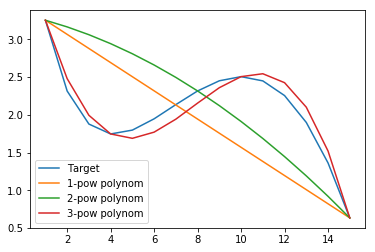

In [100]:
draw_function(ft, "Target")
approx(ft, [1, 15])
approx(ft, [1, 8, 15])
coeffs = approx(ft, [1, 4, 10, 15])

In [105]:
result2 = " ".join(map(lambda x: str(np.round(x, 2)), coeffs))
with open("submission_01_02_2.txt", "w") as f:
    f.write(result2)